Example notebook to showcase the use of the eccDefinition module. Please do not commit your local changes

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import sys
sys.path.append("../")

from measureEccentricity.measureEccentricity import get_available_methods
from measureEccentricity import measure_eccentricity
from measureEccentricity.load_data import load_waveform

/Users/vijay/opt/softs/miniconda3/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/Users/vijay/opt/softs/miniconda3/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


In [2]:
%load_ext autoreload
%autoreload 2

We will use a wraper function to mesure eccentricity which makes all the different implemented methods available to use. Let's see what methods are currently implemented

In [3]:
available_methods = list(get_available_methods().keys())
print (available_methods)

['Amplitude', 'Frequency', 'ResidualAmplitude']


In the following, we will use these different methods and show what the measured eccentricity looks like

The wrapper function, measure_eccentricity, accepts five arguments as the help function shows

In [4]:
help(measure_eccentricity)

Help on function measure_eccentricity in module measureEccentricity.measureEccentricity:

measure_eccentricity(t_ref, dataDict, method='Amplitude', extrema_finding_keywords=None, spline_keywords=None)
    Measure eccentricity and mean anomaly at reference time.
    
    parameters:
    ----------
    t_ref:
        Reference time at which to measure eccentricity and mean anomaly.
        Can be a single float or an array.
    
    dataDict:
        Dictionary containing waveform modes dict, time etc.
        Should follow the format:
            {"t": time, "hlm": modeDict, ...}
            with modeDict = {(l1, m1): h_{l1, m1},
                             (l2, m2): h_{l2, m2}, ...
                            }.
        Some methods may need extra data. For example, the ResidualAmplitude
        method, requires "t_zeroecc" and "hlm_zeroecc" as well in dataDict.
    
    extrema_finding_keywords:
        Dictionary of arguments to be passed to the peak finding function,
        where 

### Loading data

Let's now get some data in the required format, as described above, using the load_waveform function.

In [5]:
help(load_waveform)

Help on function load_waveform in module measureEccentricity.load_data:

load_waveform(**kwargs)
    FIXME add some documentation.



In [6]:
waveform_keywords = {"approximant": "EccentricTD",
                     "q": 1.0,
                     "chi1": [0.0, 0.0, 0.0],
                     "chi2": [0.0, 0.0, 0.0],
                     "deltaTOverM": 0.1,
                     "Momega0": 0.01,
                     "ecc": 0.1,
                     "mean_ano": 0,
                     "phi_ref": 0,
                     "inclination": 0,
                     "include_zero_ecc": True}

In [7]:
dataDict = load_waveform(**waveform_keywords)

We have used the keyword "include_zero_ecc" since we want to use the residual amplitude method that needs the data for the zero eccentricity counterpart

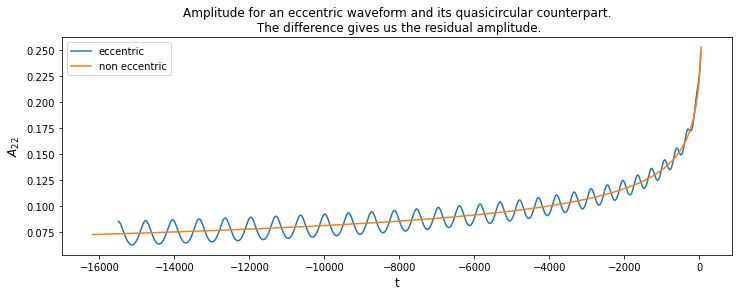

In [8]:
plt.figure(0, figsize=(12, 4))
plt.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label="eccentric")
plt.plot(dataDict["t_zeroecc"], np.abs(dataDict["hlm_zeroecc"][(2, 2)]), label="non eccentric")
plt.xlabel('t', fontsize=12)
plt.ylabel('$A_{22}$', fontsize=12)
plt.title('Amplitude for an eccentric waveform and its quasicircular counterpart.\n '
          'The difference gives us the residual amplitude.')
plt.legend();

### measuring eccentricity using all available methods

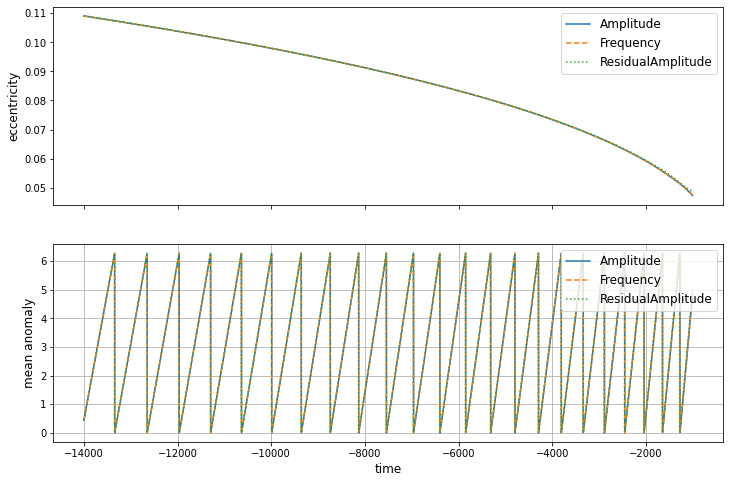

In [9]:
# refernce times at which to measure eccentricity and mean anomaly
tref_vec = np.arange(-14000, -1000)

fig, axarr = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))
for method in available_methods:
    ecc_vec, mean_ano_vec = measure_eccentricity(tref_vec, dataDict, method=method)
    if method == available_methods[0]:
        ls = 'solid'
    elif method == available_methods[1]:
        ls = 'dashed'
    else:
        ls = 'dotted'
    axarr[0].plot(tref_vec, ecc_vec, label=method, ls=ls)
    axarr[1].plot(tref_vec, mean_ano_vec, label=method, ls=ls)
axarr[1].set_xlabel("time", fontsize=12)
axarr[0].set_ylabel("eccentricity", fontsize=12)
axarr[1].set_ylabel("mean anomaly", fontsize=12)
axarr[1].grid()
axarr[0].legend(fontsize=12)
axarr[1].legend(fontsize=12)

### Visualizing the peaks and troughs in the data

Peaks and troughs in the frequency can be visualized using the different methods for measuring eccentricity

In [10]:
from measureEccentricity.eccDefinitionUsingAmplitude import eccDefinitionUsingAmplitude
from measureEccentricity.eccDefinitionUsingResidualAmplitude import eccDefinitionUsingResidualAmplitude

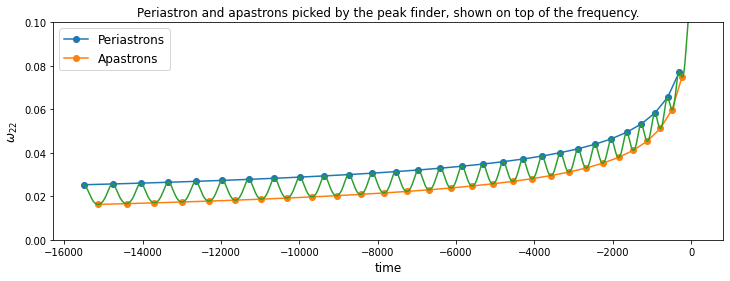

In [11]:
# Pick the method you want to use
eccMethod = eccDefinitionUsingAmplitude(dataDict)

# Get locations of Periastrons/Apastrons
peaks_location = eccMethod.find_extrema("peaks")
troughs_location = eccMethod.find_extrema("troughs")
omega22 = eccMethod.omega22
t = eccMethod.t

plt.figure(0, figsize=(12, 4))
plt.plot(t[peaks_location], omega22[peaks_location], marker="o", label='Periastrons')
plt.plot(t[troughs_location], omega22[troughs_location], marker="o", label='Apastrons')
plt.plot(t, omega22)
plt.ylim(0, 0.1)
plt.xlabel("time", fontsize=12)
plt.ylabel("$\omega_{22}$", fontsize=12)
plt.legend(fontsize=12)
plt.title('Periastron and apastrons picked by the peak finder, '
          'shown on top of the frequency.', fontsize=12);